In [1]:
dataset = []
first = True
max =0
with open('data/full_dataset_sequences.fasta') as fasta:
    for line in fasta:
        if line[0] == '>':
            if first:
                first = False
            else:
                dataset.append(entry)
            entry = {}
            header_tokens = line.split(' ')
            entry['id'] = header_tokens[0].replace('>','').split('_')[0]
            entry['header'] = line.replace('\n', '')
            entry['temp'] = float(header_tokens[1].split('=')[1].replace('\n',''))
            entry['sequence'] = ''
        else:
            entry['sequence'] = entry['sequence'] + line.replace('\n','')
            max = len(entry['sequence']) if len(entry['sequence'])> max else max





# Display thermo distribution

Max sequence len:  35213
Thermostability distribution


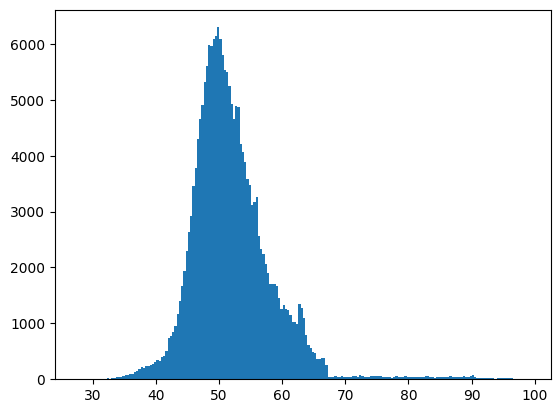

seq len distribution


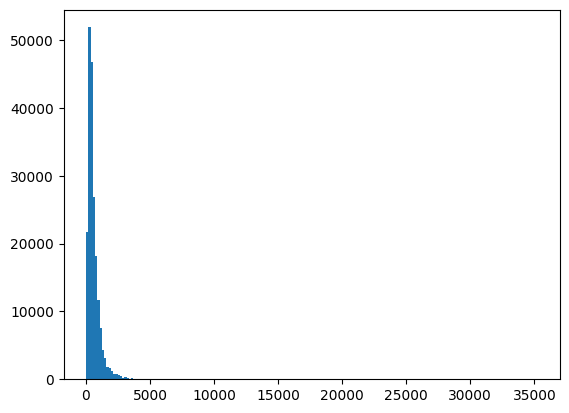

In [5]:
import numpy as np
import scipy.stats as stats
import pylab as pl
print("Max sequence len: ", max)
def plotDistribution(h: "list[float]"):
    mean = np.mean(h)
    std = np.std(h)
    fit = stats.norm.pdf(h, mean, std)  #this is a fitting indeed
    #pl.plot(h,fit,'-o')
    pl.hist(h, bins=200)      #use this to draw histogram of your data
    pl.show()                   #use may also need add this 
h = [entry["temp"] for entry in dataset]
print("Thermostability distribution")
plotDistribution(h)

print("seq len distribution")
plotDistribution([len(entry["sequence"]) for entry in dataset])

In [23]:
dataset[:3]

[{'id': 'A0A023T4K3',
  'header': '>A0A023T4K3_Caenorhabditis_elegans_lysate MELTING_POINT=37.9629473421417',
  'temp': 37.9629473421417,
  'sequence': 'MSGEEEKAADFYVRYYVGHKGKFGHEFLEFEFRPNGSLRYANNSNYKNDTMIRKEATVSESVLSELKRIIEDSEIMQEDDDNWPEPDKIGRQELEILYKNEHISFTTGKIGALADVNNSKDPDGLRSFYYLVQDLKCLVFSLIGLHFKIKPI'},
 {'id': 'A0A023T778',
  'header': '>A0A023T778_Mus_musculus_BMDC_lysate MELTING_POINT=54.4253424806097',
  'temp': 54.4253424806097,
  'sequence': 'MSMGSDFYLRYYVGHKGKFGHEFLEFEFRPDGKLRYANNSNYKNDVMIRKEAYVHKSVMEELKRIIDDSEITKEDDALWPPPDRVGRQELEIVIGDEHISFTTSKIGSLIDVNQSKDPEGLRVFYYLVQDLKCLVFSLIGLHFKIKPI'},
 {'id': 'A0A061ACF5',
  'header': '>A0A061ACF5_Caenorhabditis_elegans_lysate MELTING_POINT=49.4592155176475',
  'temp': 49.4592155176475,
  'sequence': 'MRICFLLLAFLVAETFANELTRCCAGGTRHFKNSNTCSSIKSEGTSMTCQRAASICCLRSLLDNACDSGTDIAKEEESCPSNINILGGGLKKECCDCCLLAKDLLNRNEPCVAPVGFSAGCLRSFNKCCNGDIEITHASEIITGRPLNDPHVLHLGDRCASSHCEHLCHDRGGEKVECSCRSGFDLAPDGMACVDIDECATLMDDCLESQRCLNTPGSFKCIRTLSCGTGYAMDSETE

In [24]:
import xml.etree.ElementTree as ET

In [25]:
eval_ids = set()
with open('data/uniref201803_ur50_valid_headers.txt') as txt_file:
    for line in txt_file:
        id = line.split('_')[1].replace('\n','')
        eval_ids.add(id)
print(iter(eval_ids))

In [26]:
eval_ds = []
train_ds = []

for entry in dataset:
    if entry['id'] in eval_ids:
        eval_ds.append(entry)
    else:
        train_ds.append(entry)

eval_ds[:3]

[{'id': 'A0A078BPG0',
  'header': '>A0A078BPG0_Caenorhabditis_elegans_lysate MELTING_POINT=41.1098418725276',
  'temp': 41.1098418725276,
  'sequence': 'MSALFQEVKGRQQDFMKAFNAGDAAGAASVYDPDGYFMPNGRNPVKGRSGIEAYFKEDMADGVQTAQIITEEVNGGGDWAFERGSYHLDGTKGRESGAYLQIWKKVEGVWLIHNDCFNVIKNAC'},
 {'id': 'A0A0A6YWP2',
  'header': '>A0A0A6YWP2_Mus_musculus_BMDC_lysate MELTING_POINT=42.1985268328721',
  'temp': 42.1985268328721,
  'sequence': 'MEALKVEKFTTANRGNGLRAVAPLRPGELLFRSDPLAYTVCKGSRGVVCDRCLLGKVVWERAAWLSSEPENI'},
 {'id': 'A0A0K2HAP7',
  'header': '>A0A0K2HAP7_Geobacillus_stearothermophilus_NCA26_lysate MELTING_POINT=72.3790995873377',
  'temp': 72.3790995873377,
  'sequence': 'MHQEIEIELKNLLTAAEFAAVRAAFRLDDGAFFRQENHYFDTPSFALKERAAALRIRAKEGRLTLTLKQTRADGTILEIHEPLSLSEAEAWLAGIAAPRGAIADLLAELGINPHEVRCFGSLVTDRAEWPHEGGTLCLDHNCYLQSEDYELEYEVDHVEAGEKRFLRLLEALGIPRRPAPNKIARFYARMKEMEERR'}]

In [27]:
def write_to_fasta(filename: str, ds: list):
    with open(f"data/{filename}", 'w') as f_fasta:
        for entry in ds:
            f_fasta.write(entry['header'] + ' ' + entry['sequence'] + '\n')

In [28]:
write_to_fasta('eval_sequences.fasta', eval_ds)
write_to_fasta('train_sequences.fasta', train_ds)